In [1]:
# Import modules and set options
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

sns.set(context='notebook', style='ticks')

In [2]:
lsl_dr = (pd.read_csv('../data/clean/lsl_dr.csv', index_col=0, low_memory=False)
                  .rename({'onset_1':'identify_mo'}, axis=1))

In [3]:
lsl_dr.shape

(59537, 246)

Exclusions

In [4]:
other_etiology = (lsl_dr[['etiology_3___2', 'etiology_3___4', 'etiology_3___5', 'etiology_3___6', 'etiology_3___9',
       'etiology_oth___1', 'etiology_oth___3', 'etiology_oth___4', 'etiology_oth___8', 'etiology_oth___9']]
                      .sum(1).astype(bool))

In [5]:
inclusion_mask = (~lsl_dr.non_english.astype(bool) 
                  & (lsl_dr.hl==0)
                  & ((lsl_dr.etiology_2==0)
                  | (lsl_dr.etiology_2.isnull() & ~other_etiology)))

In [6]:
inclusions = lsl_dr[inclusion_mask]
inclusions.drop_duplicates(subset='study_id').shape

(1261, 246)

In [7]:
age_mask = (lsl_dr.age_test>=48) & (lsl_dr.age_test<60)

In [8]:
lsl_dr[age_mask].drop_duplicates(subset='study_id').shape

(2419, 246)

In [9]:
data_4yo = inclusions[age_mask].copy()

/home/fonnesbeck_gmail_com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [10]:
data_4yo.drop_duplicates(subset='study_id').shape

(532, 246)

## Demographics

In [11]:
data_4yo.male.replace({1: 'Male', 0: 'Female', np.nan: 'Missing'}).value_counts()

Male      1392
Female    1362
Name: male, dtype: int64

In [12]:
data_4yo.race.replace({0:'White', 1:'Black', 2:'Hispanic', 3:'Asian', 4:'Other', np.nan:'Missing'}).value_counts()

White       1813
Black        315
Hispanic     264
Other        206
Asian        135
Missing       21
Name: race, dtype: int64

In [13]:
(data_4yo.premature_age.replace({9:None})==8).replace({True: '>=36 weeks', False: '<36 weeks', 
                                                            np.nan: 'Unknown'}).value_counts()

>=36 weeks    2050
<36 weeks      704
Name: premature_age, dtype: int64

In [14]:
data_4yo.sib.replace({0:'1', 1:'2', 2:'3', 3:'4+', np.nan:'Missing'}).value_counts().sort_index()

1           632
2          1083
3           590
4+          341
Missing     108
Name: sib, dtype: int64

In [15]:
ed_lookup = {0:"8th grade or less",
1:"Some high school",
2:"High school diploma/GED",
3:"Some college",
4:"Bachelor's degree",
5:"Post graduate degree",
6:"Unknown",
np.nan:"Unknown"}

data_4yo.mother_ed.replace(ed_lookup).value_counts()

High school diploma/GED    854
Some high school           707
Unknown                    649
Some college               479
8th grade or less           65
Name: mother_ed, dtype: int64

In [16]:
data_4yo.father_ed.replace(ed_lookup).value_counts()

Unknown                    806
Bachelor's degree          640
Some college               490
Post graduate degree       434
High school diploma/GED    329
Some high school            55
Name: father_ed, dtype: int64

In [17]:
family_lookup = {0:"Ideal Participation",
1:"Good Participation",
2:"Average Participation",
3:"Below Average",
4:"Limited Participation",
np.nan:"Missing"}

data_4yo.family_inv.replace(family_lookup).value_counts()

Ideal Participation      960
Good Participation       594
Average Participation    565
Missing                  366
Below Average            217
Limited Participation     52
Name: family_inv, dtype: int64

In [18]:
data_4yo[["age_diag", "age_amp", "age_int", "age"]].describe()

,age_diag,age_amp,age_int,age
count,2260.000000,2213.000000,2014.000000,2731.000000
mean,8.780973,13.522820,14.683714,23.627609
std,12.326118,13.324984,13.250829,15.624746
min,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,4.000000,9.000000
50%,3.000000,8.000000,10.000000,23.000000
75%,14.000000,21.000000,22.750000,36.000000
max,55.000000,65.000000,60.000000,73.000000


In [19]:
data_4yo.otherserv.replace({0: "OPTION + outside", 1: "OPTION only", 2: "Missing"}).value_counts()

OPTION only         1141
Missing              311
OPTION + outside     301
Name: otherserv, dtype: int64

## Hearing loss

In [20]:
data_4yo.degree_hl_ad.isnull().sum()

53

In [21]:
data_4yo.degree_hl_as.isnull().sum()

60

In [22]:
data_4yo.degree_hl_ad.value_counts()

6.0    1176
4.0     438
5.0     405
3.0     378
2.0     215
0.0      52
1.0      37
Name: degree_hl_ad, dtype: int64

In [23]:
data_4yo.degree_hl_as.value_counts()

6.0    1205
4.0     458
3.0     410
5.0     339
2.0     149
0.0      83
1.0      50
Name: degree_hl_as, dtype: int64

In [24]:
hl_data = data_4yo.set_index('study_id')[['bilateral_snhl',
                     'bilateral_ansd',
                     'bilateral_mixed',
                     'bilateral_cond',
                     'bilateral_normal',
                     'bilateral_unk',
                     'unilateral_snhl',
                     'unilateral_ansd',
                     'unilateral_mixed',
                     'unilateral_cond',
                     'unilateral_unk',
                     'assymetrical']]

One or both parents with hearing loss

In [25]:
data_4yo.one_or_both_parent_hl.value_counts()

0.0    1967
1.0     147
Name: one_or_both_parent_hl, dtype: int64

In [26]:
data_4yo.one_or_both_parent_hl.isnull().sum()

640

Individuals with no hearing loss type

In [27]:
hl_data[hl_data.sum(1)==0].index.values

array(['1045-2010-0056', '1045-2010-0056', '1045-2010-0056',
       '1045-2010-0056', '1045-2010-0056', '1149-2008-0008',
       '1149-2008-0019', '1149-2008-0019', '0938-2014-0019',
       '0938-2014-0019', '0938-2014-0019', '0205-2015-0005',
       '0205-2014-0006', '0205-2014-0006', '0205-2014-0006',
       '1149-2010-0052', '1149-2010-0052', '1149-2010-0052',
       '1149-2010-0052', '1149-2010-0052', '1149-2010-0046',
       '1149-2010-0046', '1149-2010-0046', '1149-2010-0046',
       '1149-2010-0046', '1149-2010-0046', '1149-2010-0034',
       '1149-2010-0034', '1149-2010-0034', '1149-2010-0034',
       '1149-2010-0034', '1149-2010-0034', '1149-2009-0038',
       '1149-2009-0038', '1149-2009-0038', '0938-2010-0017',
       '0938-2010-0017', '0938-2010-0017', '0938-2010-0017',
       '0938-2010-0017', '0938-2010-0017', '0938-2009-0013',
       '0938-2010-0017', '0938-2010-0017', '0938-2010-0017',
       '0101-2013-0101', '0101-2013-0101', '0101-2013-0101',
       '0101-2013-0101',

In [28]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_snhl      2069
bilateral_cond       160
bilateral_ansd       112
assymetrical          98
bilateral_mixed       92
unilateral_snhl       77
unilateral_cond       54
unilateral_mixed      13
unilateral_ansd        9
bilateral_normal       6
unilateral_unk         0
bilateral_unk          0
dtype: int64

In [29]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_snhl      0.75
bilateral_cond      0.06
assymetrical        0.04
bilateral_ansd      0.04
unilateral_snhl     0.03
bilateral_mixed     0.03
unilateral_cond     0.02
unilateral_unk      0.00
unilateral_mixed    0.00
unilateral_ansd     0.00
bilateral_unk       0.00
bilateral_normal    0.00
dtype: float64

In [30]:
tech_data = data_4yo.set_index('study_id')[['bilateral_ha',
                     'bilateral_ci',
                     'bimodal',
                     'bilateral_other',
                     'unilateral_ha',
                     'unilateral_ci',
                     'unilateral_other']]

In [31]:
tech_data.sum().astype(int).sort_values(ascending=False)

bilateral_ci        1905
bilateral_ha         554
bimodal              182
unilateral_ha         53
unilateral_ci         45
bilateral_other        4
unilateral_other       0
dtype: int64

In [32]:
tech_data.mean().round(2).sort_values(ascending=False)

bilateral_ci        0.69
bilateral_ha        0.20
bimodal             0.07
unilateral_ci       0.02
unilateral_ha       0.02
unilateral_other    0.00
bilateral_other     0.00
dtype: float64

Individuals with no technology type

In [33]:
tech_data[tech_data.sum(1)==0].index.values

array(['0523-2015-0002', '0523-2015-0002', '0523-2015-0002',
       '0412-2002-0068', '0412-2002-0068', '0412-2003-0060',
       '0412-2003-0060', '0412-2003-0060', '0412-2003-0060',
       '0412-2003-0060', '0412-2003-0060'], dtype=object)

## Hearing Loss

In [34]:
data_4yo.columns[data_4yo.columns.str.contains('_hl_')]

Index(['degree_hl_ad', 'type_hl_ad', 'degree_hl_as', 'type_hl_as',
       'bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound'],
      dtype='object')

In [35]:
hl_data = data_4yo.set_index('study_id')[['bilateral_hl_normal', 'bilateral_hl_slight', 'bilateral_hl_mild',
       'bilateral_hl_moderate', 'bilateral_hl_modsev', 'bilateral_hl_severe',
       'bilateral_hl_profound', 'unilateral_hl_slight', 'unilateral_hl_mild',
       'unilateral_hl_moderate', 'unilateral_hl_modsev',
       'unilateral_hl_severe', 'unilateral_hl_profound']]

In [36]:
hl_data.sum().astype(int).sort_values(ascending=False)

bilateral_hl_profound     1003
bilateral_hl_modsev        294
bilateral_hl_moderate      264
bilateral_hl_severe        194
bilateral_hl_mild           95
unilateral_hl_profound      39
unilateral_hl_severe        29
unilateral_hl_mild          29
unilateral_hl_modsev        27
bilateral_hl_slight         12
unilateral_hl_slight         6
unilateral_hl_moderate       5
bilateral_hl_normal          0
dtype: int64

In [37]:
hl_data.mean().round(2).sort_values(ascending=False)

bilateral_hl_profound     0.36
bilateral_hl_modsev       0.11
bilateral_hl_moderate     0.10
bilateral_hl_severe       0.07
bilateral_hl_mild         0.03
unilateral_hl_profound    0.01
unilateral_hl_severe      0.01
unilateral_hl_modsev      0.01
unilateral_hl_mild        0.01
unilateral_hl_moderate    0.00
unilateral_hl_slight      0.00
bilateral_hl_slight       0.00
bilateral_hl_normal       0.00
dtype: float64

Missing one or both hearing loss values (left/right)

In [38]:
(data_4yo[['degree_hl_ad', 'degree_hl_as']].isnull().sum(1) > 0).sum()

60

## Summary of scores by domain

In [39]:
test_scores = inclusions[age_mask].copy()

/home/fonnesbeck_gmail_com/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


In [40]:
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='receptive'), 
           'domain'] = 'Receptive Language'
test_scores.loc[(test_scores.domain=='Language') & (test_scores.test_type=='expressive'), 
           'domain'] = 'Expressive Language'

In [41]:
test_scores.groupby('domain').score.describe().round(1)

,count,mean,std,min,25%,50%,75%,max
domain,,,,,,,,
Articulation,355.0,85.6,20.3,0.0,72.0,88.0,101.0,121.0
Expressive Language,483.0,86.8,20.2,45.0,73.0,86.0,102.0,136.0
Expressive Vocabulary,469.0,95.7,21.4,0.0,83.0,97.0,111.0,140.0
Language,492.0,88.7,21.2,48.0,73.0,88.0,104.0,163.0
Receptive Language,482.0,90.5,19.6,50.0,76.0,90.0,106.0,145.0
Receptive Vocabulary,473.0,94.4,18.8,0.0,82.0,96.0,109.0,135.0


In [ ]:
sns.boxplot()

In [50]:
sns.palettes.crayons['Copper']

'#DD9475'

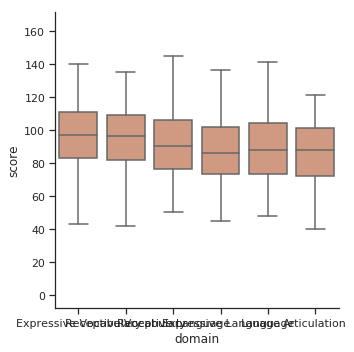

In [51]:
sns.catplot("domain", y="score", data=test_scores, kind="box", color=sns.palettes.crayons['Copper'], fliersize=0)

## Domain-specific summaries

Age of amplification greater than 6mo.

In [46]:
(test_scores.assign(age_amp_greater_6=test_scores.age_amp>6)
         .groupby(['domain', 'age_amp_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_amp_greater_6                                      
Articulation          False              207.0  88.956522  19.487687  40.0   
                      True               148.0  80.972973  20.467976   0.0   
Expressive Language   False              278.0  89.532374  20.077396  48.0   
                      True               205.0  83.097561  19.858328  45.0   
Expressive Vocabulary False              274.0  96.262774  19.921925  28.0   
                      True               195.0  95.020513  23.441957   0.0   
Language              False              281.0  90.708185  20.351033  50.0   
                      True               211.0  85.981043  22.025086  48.0   
Receptive Language    False              279.0  92.039427  18.895259  50.0   
                      True               203.0  88.438424  20.466101  50.0   
Receptive Vocabulary  False              277.0  95.361011  17.928390  43.0   
                      True               196.0  92.928571  20.002949   0.0   

                                           25%   50%     75%    max  
domain                age_amp_greater_6                              
Articulation          False              76.00  92.0  104.50  121.0  
                      True               69.00  83.5   95.25  118.0  
Expressive Language   False              74.25  90.5  104.00  136.0  
                      True               69.00  81.0   98.00  134.0  
Expressive Vocabulary False              83.00  98.0  110.75  137.0  
                      True               83.00  96.0  113.00  140.0  
Language              False              76.00  92.0  106.00  141.0  
                      True               69.00  85.0  101.50  163.0  
Receptive Language    False              79.00  92.0  107.00  132.0  
                      True               72.50  88.0  104.50  145.0  
Receptive Vocabulary  False              84.00  97.0  109.00  135.0  
                      True               81.00  94.0  109.00  132.0

Age of enrollment greater than 6mo.

In [52]:
(test_scores.assign(age_enroll_greater_6=test_scores.age_int>6)
         .groupby(['domain', 'age_enroll_greater_6'])
         .score.describe())

count       mean        std   min  \
domain                age_enroll_greater_6                                      
Articulation          False                 207.0  86.719807  21.469526   0.0   
                      True                  148.0  84.101351  18.400584  40.0   
Expressive Language   False                 272.0  87.919118  20.844550  48.0   
                      True                  211.0  85.360190  19.330044  45.0   
Expressive Vocabulary False                 267.0  95.767790  22.111100   0.0   
                      True                  202.0  95.717822  20.574451   0.0   
Language              False                 276.0  89.528986  21.344343  48.0   
                      True                  216.0  87.597222  20.997670  50.0   
Receptive Language    False                 272.0  91.330882  20.060078  50.0   
                      True                  210.0  89.476190  19.060265  50.0   
Receptive Vocabulary  False                 268.0  93.958955  19.760983   0.0   
                      True                  205.0  94.868293  17.581386  35.0   

                                              25%   50%     75%    max  
domain                age_enroll_greater_6                              
Articulation          False                 73.50  91.0  102.00  120.0  
                      True                  72.00  84.0   97.25  121.0  
Expressive Language   False                 73.00  87.0  104.00  136.0  
                      True                  71.00  85.0  100.00  134.0  
Expressive Vocabulary False                 81.50  98.0  111.50  140.0  
                      True                  83.00  97.0  110.00  139.0  
Language              False                 74.00  91.0  106.00  141.0  
                      True                  72.75  87.5  102.00  163.0  
Receptive Language    False                 77.75  91.0  107.00  136.0  
                      True                  74.00  90.0  103.00  145.0  
Receptive Vocabulary  False                 82.00  95.5  109.00  135.0  
                      True                  83.00  97.0  109.00  133.0

(Non-)Profound hearing loss

In [51]:
(test_scores.assign(profound_hl=test_scores.degree_hl==6)
         .groupby(['domain', 'profound_hl'])
         .score.describe())

count       mean        std   min    25%  \
domain                profound_hl                                             
Articulation          False        175.0  87.857143  18.276206  42.0  74.00   
                      True         180.0  83.461111  21.853081   0.0  71.75   
Expressive Language   False        243.0  91.106996  19.742267  45.0  76.50   
                      True         240.0  82.441667  19.790237  48.0  67.00   
Expressive Vocabulary False        228.0  99.228070  20.578221   0.0  88.00   
                      True         241.0  92.452282  21.758878   0.0  79.00   
Language              False        250.0  93.616000  20.494209  50.0  80.00   
                      True         242.0  83.582645  20.730322  48.0  68.00   
Receptive Language    False        242.0  95.132231  18.674740  50.0  83.00   
                      True         240.0  85.875000  19.514424  50.0  69.75   
Receptive Vocabulary  False        235.0  97.161702  17.174800  35.0  86.00   
                      True         238.0  91.579832  19.990291   0.0  79.00   

                                     50%     75%    max  
domain                profound_hl                        
Articulation          False         88.0  102.00  120.0  
                      True          87.0  100.00  121.0  
Expressive Language   False         91.0  105.00  136.0  
                      True          81.0   97.25  131.0  
Expressive Vocabulary False        101.0  113.25  139.0  
                      True          94.0  107.00  140.0  
Language              False         94.0  108.00  163.0  
                      True          82.0   99.50  135.0  
Receptive Language    False         96.0  109.00  145.0  
                      True          86.0  101.00  133.0  
Receptive Vocabulary  False         99.0  110.00  135.0  
                      True          91.0  108.00  133.0

Parent with(out) hearing loss

In [57]:
test_scores.loc[test_scores.parent_hearing_loss=='Unknown', 'parent_hearing_loss'] = np.nan
(test_scores.assign(parent_with_hl=test_scores.parent_hearing_loss.isin(['Both parents have hearing loss',
                                                                       'Father has hearing loss',
                                                                       'Mother has hearing loss']))
         .groupby(['domain', 'parent_with_hl'])
         .score.describe())

count       mean        std   min  \
domain                parent_with_hl                                      
Articulation          False           339.0  85.787611  20.322016   0.0   
                      True             16.0  82.250000  19.212843  40.0   
Expressive Language   False           455.0  86.628571  20.146612  45.0   
                      True             28.0  89.607143  21.505106  53.0   
Expressive Vocabulary False           445.0  95.611236  21.634231   0.0   
                      True             24.0  98.250000  17.649363  58.0   
Language              False           465.0  88.606452  21.200448  48.0   
                      True             27.0  89.962963  21.425150  50.0   
Receptive Language    False           455.0  90.534066  19.658159  50.0   
                      True             27.0  90.333333  19.554657  51.0   
Receptive Vocabulary  False           448.0  94.189732  18.886975   0.0   
                      True             25.0  97.280000  17.954851  64.0   

                                        25%    50%    75%    max  
domain                parent_with_hl                              
Articulation          False           72.00   88.0  101.0  121.0  
                      True            73.50   84.0   98.0  110.0  
Expressive Language   False           71.50   86.0  101.5  136.0  
                      True            74.50   89.5  107.0  131.0  
Expressive Vocabulary False           83.00   97.0  111.0  140.0  
                      True            85.25  102.5  113.0  124.0  
Language              False           73.00   88.0  104.0  163.0  
                      True            73.50   90.0  108.0  127.0  
Receptive Language    False           76.00   90.0  106.0  145.0  
                      True            77.00   92.0  105.5  124.0  
Receptive Vocabulary  False           82.00   96.0  109.0  135.0  
                      True            86.00   97.0  111.0  124.0

Mother with(out) college education

In [59]:
test_scores.groupby(['domain', 'mother_college']).score.describe()

count        mean        std   min  \
domain                mother_college                                       
Articulation          0               193.0   83.134715  20.236170   0.0   
                      1               162.0   88.598765  19.947590   0.0   
Expressive Language   0               252.0   80.940476  19.010178  48.0   
                      1               231.0   93.194805  19.581073  45.0   
Expressive Vocabulary 0               236.0   89.779661  20.628275   0.0   
                      1               233.0  101.789700  20.576046   0.0   
Language              0               252.0   82.079365  19.763786  48.0   
                      1               240.0   95.612500  20.452513  50.0   
Receptive Language    0               250.0   84.892000  19.171608  50.0   
                      1               232.0   96.590517  18.304791  50.0   
Receptive Vocabulary  0               238.0   88.731092  18.566881   0.0   
                      1               235.0  100.046809  17.366645  35.0   

                                        25%    50%    75%    max  
domain                mother_college                              
Articulation          0               69.00   85.0   99.0  118.0  
                      1               77.00   89.0  104.0  121.0  
Expressive Language   0               67.00   79.0   94.0  135.0  
                      1               80.50   94.0  107.0  136.0  
Expressive Vocabulary 0               77.75   91.0  103.0  138.0  
                      1               90.00  103.0  117.0  140.0  
Language              0               67.75   81.0   96.0  136.0  
                      1               82.00   97.0  110.0  163.0  
Receptive Language    0               69.00   85.0   99.0  138.0  
                      1               86.00   98.0  111.0  145.0  
Receptive Vocabulary  0               78.00   88.5  103.0  128.0  
                      1               89.00  101.0  113.0  135.0